<B>
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
Now Find the number of posts these handles have done in the previous 3 days.
Depict this information using a suitable graph.

In [1]:
import selenium 
from bs4 import BeautifulSoup
from selenium import webdriver
import time 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException 
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
import datetime
from datetime import datetime, timezone
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


#### <p style = "color : Red"> Function for logging into Instagram

In [3]:
def loginInsta() : 
    waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.TAG_NAME,"input")))
    text_boxes = driver.find_elements_by_tag_name('input')
    sampleUserName = 'Riyrai413@gmail.com'
    samplePassword = 'Instagram@123'
    username = text_boxes[0]
    password = text_boxes[1]
    username.send_keys(sampleUserName)
    password.send_keys(samplePassword)
    sub_btn = driver.find_element_by_xpath('//button[@type= "submit"]')
    sub_btn.click()

In [4]:
driver.get('https://www.instagram.com/')
loginInsta()
# close the save info window
waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"cmbtv")))
NotNowSection = driver.find_element_by_class_name("cmbtv")
NotNowSection.click()
# close the turn on post notification window
waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"HoLwm")))
NotNowSection = driver.find_element_by_class_name("HoLwm")
NotNowSection.click()

###  From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [5]:
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "TqC_a")))
search_box = driver.find_element_by_class_name('TqC_a ')
search_box.click()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "XTCLo")))
driver.find_element_by_class_name('XTCLo').send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))

# p =  driver.find_elements_by_xpath('//a[@class = "-qQT3"]/div/div[contains(@class,"vwCYk")]/div/div/div/div')
p =  driver.find_elements_by_xpath('//a[@class = "-qQT3"]')
foodPageslist = {}
for i in range(10):
    link = p[i].get_attribute('href')
    # Avoid tags just include usernames 
    if '/explore/tags/' in link:
        i -= 1
        continue
    foodPageslist[link] =0

#### <p style = "color : Red"> First 10 Handles when searched for term 'Food' 

In [10]:
def findNumOfFollowers():
    # Assuming we are on the profile page
    waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'g47SY')))
    nof = driver.find_elements_by_class_name("g47SY")[1].get_attribute('title')
    nof = nof.replace(',','')
    return float(nof)

In [12]:
print("First 10 Handles when searched for term 'Food' ")
for page,followers in foodPageslist.items():
    print(page)
    driver.get(page)
    nof = findNumOfFollowers()
    foodPageslist[page] = nof
time.sleep(10)    
#     /* We will save number of posts in this list only */
# driver.get('https://www.instagram.com/')


First 10 Handles when searched for term 'Food' 
https://www.instagram.com/food_tour_ent/
2695.0
https://www.instagram.com/foodie___hum/
199.0
https://www.instagram.com/indian_tasty_food/
16047.0
https://www.instagram.com/indorefooddage/
2731.0
https://www.instagram.com/addicted_food_/
35.0
https://www.instagram.com/indorefoodexplorer/
148447.0
https://www.instagram.com/food/
164162.0
https://www.instagram.com/foodie_incarnate/
1266999.0
https://www.instagram.com/foodzeee/
1168548.0


#### <p style = "color : Red">Now Wait until links of all ten pages gets printed. </p>

### <p style = "color : oRANGE"> <I>1. TOP 5 ACCOUNTS WITH HIGHEST NUMBER OF FOLLOWERS ARE : </I>

In [13]:

foll = sorted(foodPageslist.items(), key=lambda item: item[1],reverse = True)[:5]
foll
names = []
links = []
followers = []
print("Top 5 accounts with Highest number of followers are : ")
for f in foll:
    link = f[0]
    links.append(link)
    name  = link.replace('https://www.instagram.com/','')
    name = name.replace('/','')
    names.append(name)
    follower = f[1]
    followers.append(f[1])
    print(name , "--> " , follower)

Top 5 accounts with Highest number of followers are : 
foodie_incarnate -->  1266999.0
foodzeee -->  1168548.0
food -->  164162.0
indorefoodexplorer -->  148447.0
indian_tasty_food -->  16047.0


### <p style = "color : oRANGE"> <I>2. Number of post of a page in last three days


In [8]:
def NumofPostLast3Days():
    numOpost,i ,num_of_days,posttime = 0 ,0 , None,None
    flag = True
    currtime = datetime.now()
    while flag:
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        # find the time tag 
        waiter = WebDriverWait(driver,50).until(EC.presence_of_element_located((By.XPATH,"//a[@class = 'c-Yi7']/time")))
        posttime  = driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime')[:10]
        #convert time to comparable format
        posttime = datetime.strptime(posttime,'%Y-%m-%d')
        num_of_days = (currtime - posttime).days
        if num_of_days <= 3:
            numOpost += 1
        else :
            flag = False
        i+=1
        driver.back()
    return numOpost

In [ ]:
print("Number of Posts by those accounts in last three days are as follows : ")

#Now again go on each handle and take out no. of post in last three days 
numofPosts = []
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # function that returns number of post in last three days
    numPost = NumofPostLast3Days()
    print(names[i], " - " , numPost)
    numofPosts.append(numPost)


Number of Posts by those accounts in last three days are as follows : 


### <p style = "color : oRANGE"> <I>3.Depict this information using a suitable graph.

#### <p style = "color : Red"> <I>USERS VS. FOLLOWERS COUNT

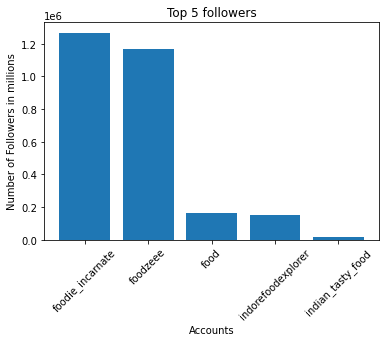

In [14]:
import matplotlib.pyplot as plt
plt.bar(names,followers)
plt.xticks(rotation = 45)
plt.xlabel("Accounts")
plt.ylabel("Number of Followers in millions")
plt.title("Top 5 followers")
plt.show()

#### <p style = "color : Red"> <I> USERS VS. NUMBER OF POSTS

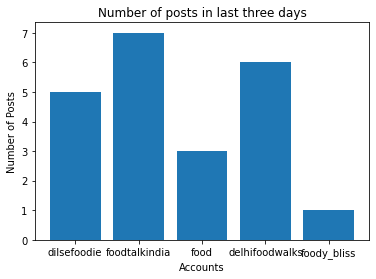

In [59]:
import matplotlib.pyplot as plt
plt.bar(names,numofPosts)
plt.xlabel("Accounts")
plt.ylabel("Number of Posts")
plt.xticks(rotation = 45)
plt.title("Number of posts in last three days")
plt.show()

#### <B>2.  Your friend also needs a list of hashtags that he should use in his posts. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.Create a csv file with two columns : the word and its frequency.Now, find the hashtags that were most popular among these bloggers. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### <p style = "color : oRANGE"> <I>1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [28]:
def Scrapecontent(numofposts,words):
    for i in range(numofposts):
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        #print Complete Content 
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"MOdxS")))
        print(driver.find_element_by_class_name("MOdxS").text)
        print(" Next Post")
        #find content words hashtags
        for x in driver.find_elements_by_class_name("xil3i"):
            words[x.text] = words.get(x.text,0)+1
        driver.back()

In [29]:
# open the first five handles and perform the fnction
words = {}
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # Scrape the content of first 10 posts

    Scrapecontent(10,words)


Jamun season is almost here😍😍 Are you a jamun lover??
.
Jamun or Black plum is an important summer fruit, associated with many health and medicinal benefits. Jamun is known to relieve stomach pain, carminative, anti-scorbutic and diuretic. Jamun vinegar is good to reduce enlargement of spleen, diarrhoea, and those have urine retention problems. Jamum’s ployphenolic compounds are effective against cancer, heart diseases, diabetes, asthma and arthritis. Enjoy it in summers🤗🤗
.
#foodieincarnate #sodelhi #newdelhi #delhigram #foodtalkindia #desifood #jamun #fruitarian #freshfruit #marathi #maharashtra_ig #fruitbowl #veganfood #delhite #somumbai #mumbaifoodblogger #mumbaistreetfood #sokolkata #mumbai_igers #tropicalfruit #hydrovegan #dragonfruit #starfruit #delhifood #summerfruit #summerfood #seasonalfruit #fruitmarket #farmtotable #diabetesfood
 Next Post
Famous Neem Kachori of Shikohabad🤩🤩
.
Kindly watch the full video for location, price and other details🤗🤗
.
#foodieincarnate #sodelhi #n

@udhayakrishna_ghee , the season of love’s biggest #asal #giveaway is now live!🔥

To participate:👇

1⃣Follow @udhayakrishna_ghee
2⃣ Comment your favourite sweet and why you love making it!
3️⃣ Like the reel

👥 Reward: Gift hamper from Udhayakrishna
⏱️Ends March 5th, 6pm IST

We made this traditional, gheelicious pineapple kesari with udhaya_krishna pure and aromatic agmark ghee .

Participate now 10 lucky ones will be selected and given gift hampers ‼️

#kesari#pineapplekesari#ghee#udhayakrishnaghee#foodzeee
 Next Post
4 types soft & spongy idlis with homemade batter

Detailed recipe video on my YouTube channel.

#idli#foodzeee
 Next Post
Kathirikkai ( Brinjal ) Dalcha with Ghee rice

Detailed recipe video on my YouTube channel

#dalcha #neisoru #gheerice #foodzeee
 Next Post
Mini Tiffin / Indian Breakfast Thali

Watch the full video on my YouTube channel

#minitiffin #breakfastthali #foodzeee
 Next Post
Vazhaikaithandu soup / Banana stem Soup

Detailed recipe video on my YouTube chann

### <p style = "color : oRANGE"> <I>Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [19]:
for key,val in words.items():
    print(key , "--> ", val)

#foodieincarnate -->  8
#sodelhi -->  7
#newdelhi -->  7
#foodtalkindia -->  7
#desifood -->  3
#delhigram -->  6
#indianfood -->  6
#thali -->  1
#gulabjamun -->  1
#paneer -->  1
#ahmedabadfood -->  1
#ahmedabadfoodie -->  1
#gujaratifood -->  1
#biryani -->  3
#manchurian -->  1
#papad -->  1
#lassi -->  1
#paneertikka -->  1
#meerutfood -->  1
#mumbaifoodblogger -->  2
#indianfoodblogger -->  4
#delhifoodblogger -->  4
#northindian -->  1
#northindianfood -->  1
#gujju -->  1
#ahmedabadblogger -->  1
#platter -->  1
#indianfoodie -->  4
#thingstodoinmumbai -->  1
#indiancuisine -->  1
#foodgasm -->  3
#foodporn -->  3
#foodpornshare -->  3
#foodlover -->  3
#foodgram -->  3
#foodiesofinstagram -->  3
#foodie -->  4
#indianstreetfood -->  4
#streetfood -->  6
#delhistreetfood -->  4
#streetfoodindia -->  3
#mumbaistreetfood -->  4
#delhifoodie -->  3
#foodblogger -->  3
#desikhana -->  4
#indianfoodbloggers -->  3
#delhifood -->  4
#mumbai -->  4
#delhi -->  5
#kachori -->  1
#shiko

### <p style = "color : oRANGE"> <I>Create a csv file with two columns : the word and its frequency

In [13]:
with open('Content.csv','w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Hashtage","Freq"])
    for key,value in words.items():
        writer.writerow([key,value])    

### <p style = "color : oRANGE"> <I> Now, find the hashtags that were most popular among these bloggers

In [22]:
import pandas as pd
Contentdf = pd.read_csv('Content.csv')
sortind = Contentdf['Freq'].argsort()[::-1]
frequency = Contentdf.iloc[sortind]['Freq'][:5]
keywords = Contentdf.iloc[sortind]['Hashtage'][:5]
frequency = frequency.values
keywords = keywords.values
for hashtag in keywords:
    print(hashtag)

#dilsefoodie
#dilsecouple
#foodfaves
#GarnishWars
#sodelhi


### <p style = "color : oRANGE"> <I>Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

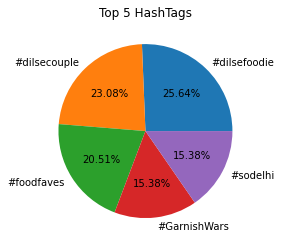

In [24]:
plt.pie(frequency ,labels =  keywords,autopct="%.2f%%" )
plt.title("Top 5 HashTags")
plt.show()

#### You need to also calculate average followers : likes ratio for the obtained handles.Followers : Likes ratio is calculated as follows:Find out the likes of the top 10 posts of the 5 handles obtained earlier.Calculate the average likes for a handle.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.Create a bar graph to depict the above obtained information.

### <p style = "color : oRANGE"> <I>1. Go on each profile
### <p style = "color : oRANGE"> <I>2. Go on each post (10 posts) 
### <p style = "color : oRANGE"> <I>3. Collect no. of likes , add them , divide by 10
### <p style = "color : oRANGE"> <I>4. divide the avg likes by num of followers that we already have 

In [10]:
def collectAvgNumLikes(numofposts):
    totalLikes  = 0 
    for i in range(numofposts):
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        #find No. of likes 
        try :
            likeEl = driver.find_element_by_xpath("//div[contains(@class,'xLCgt') and contains(@class,'fDxYl')]/span")
            numLikes = float(likeEl.text.replace(',',''))
        except NoSuchElementException :
            try :
                button_like= WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CLASS_NAME,"vcOH2")))
                driver.execute_script("arguments[0].click();", button_like)
                numLikes = float(driver.find_elements_by_xpath("//div[contains(@class,'vJRqr')]/span")[0].text.replace(',',''))
            except TimeoutException :
                numLikes = 0
        totalLikes += numLikes
        driver.back()
    avgLikes = totalLikes/numofposts
    return avgLikes

In [28]:
ratio = []
avgLikesList = []
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # Go on first 10 posts and extract avg likes -> argument = number of posts
    avgLikes = collectAvgNumLikes(10)
    avgLikesList.append(avgLikes)
    ratio.append(avgLikes/followers[i])
print(ratio)    

[0.027351497565611567, 0.0047043969918208264, 0.0004446870009904392, 0.06373528286649381, 0.1237035651957118]


### <p style = "color : oRANGE"> <I>5. Create a bar graph 

In [43]:
ratio = np.array(avgLikesList)/np.array(followers)
ratio = ratio * 100
plt.bar(names,ratio, color='orange')
plt.xlabel("Users")
plt.ylabel("Likes : follower Ratio")
plt.xticks(rotation=45, size=12)
plt.show()

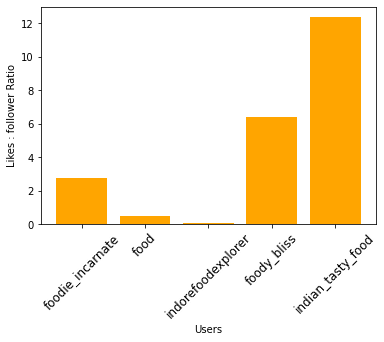